<a href="https://colab.research.google.com/github/PosgradoMNA/TC5035.10.Equipo6/blob/main/Avance1_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

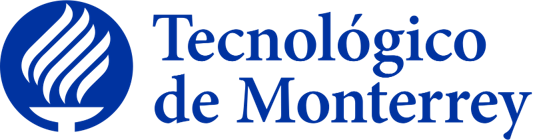

---
# **Maestría en Inteligencia Artificial Aplicada**
## **Curso: Proyecto Integrador**
### **Desarrollo de un Sistema de Visión mediante OpenCV para el Aseguramiento de la Calidad Final de Motores para Aplicaciones Robóticas**
### Profesora Titular: Dra. Grettel Barceló Alonso
### Profesor Titular: Dr. Luis Eduardo Falcón Morales
### Profesor Tutor: María De La Paz Rico Fernández
### Actividad: Avance 1 - Análisis Exploratorio de Datos (EDA)
###Alumnos:
* A01793672 - Freddy Armendariz Herrera
* A01793668 - Samuel Elías Flores González
* A01793814 - Emerson Jonathan Rincón Morales
---

**Introducción:**

El análisis exploratorio de imágenes es una etapa fundamental en el procesamiento y análisis de datos de imágenes. Sirve para comprender las características y propiedades de las imágenes antes de realizar tareas específicas de procesamiento o análisis.

El EDA nos permite obtener una visión general de las imágenes en el conjunto de datos, incluyendo su tamaño, resolución, formato y calidad general. Esto es esencial para evaluar la idoneidad de las imágenes para el análisis previsto.

Además, facilita la detección temprana de problemas comunes en las imágenes, como artefactos de adquisición, ruido, distorsiones, borrosidad o problemas de iluminación. Identificar y abordar estos problemas desde el principio puede mejorar la calidad de los resultados finales. Tambien se puede determinar las técnicas de preprocesamiento más adecuadas para aplicar a las imágenes antes de realizar análisis más avanzados. Por ejemplo, el análisis exploratorio puede revelar la necesidad de corregir el balance de blancos, normalizar la iluminación, reducir el ruido, entre otros.


##**Importación de Librerías**

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import exposure

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Descripcion de los datos**

In [162]:
def ShowImagesExploratotyData(pictures, titles, x, y):
    qty = len(pictures)
    fig = plt.figure(figsize=(x, y))
    for i, (img, tit) in enumerate(zip(pictures, titles)):
        a = fig.add_subplot(3, 5, i+1)
        imgplot = plt.imshow(img, cmap="gray")
        a.set_title(tit)
    plt.show()

In [163]:
pics = []  # Lista para almacenar las imágenes
tits = []  # Lista para almacenar los títulos

# Ruta base de las imágenes
ruta_base = '/content/sample_data/img'

# Número total de imágenes que quieres almacenar
num_imagenes = 15


# Ahora, la lista pics contendrá todas las imágenes y la lista tits contendrá los títulos correspondientes

In [164]:
# Bucle para cargar las imágenes y añadirlas a la lista
for i in range(1, num_imagenes + 1):
    ruta_imagen = ruta_base + str(i) + '.jpeg'  # Construir la ruta de la imagen
    imagen = cv2.imread(ruta_imagen)  # Cargar la imagen desde la ruta (debes tener una función cargar_imagen)
    pics.append(imagen)  # Añadir la imagen a la lista pics
    tits.append(f'Imagen {i}')  # Añadir un título a la lista tits


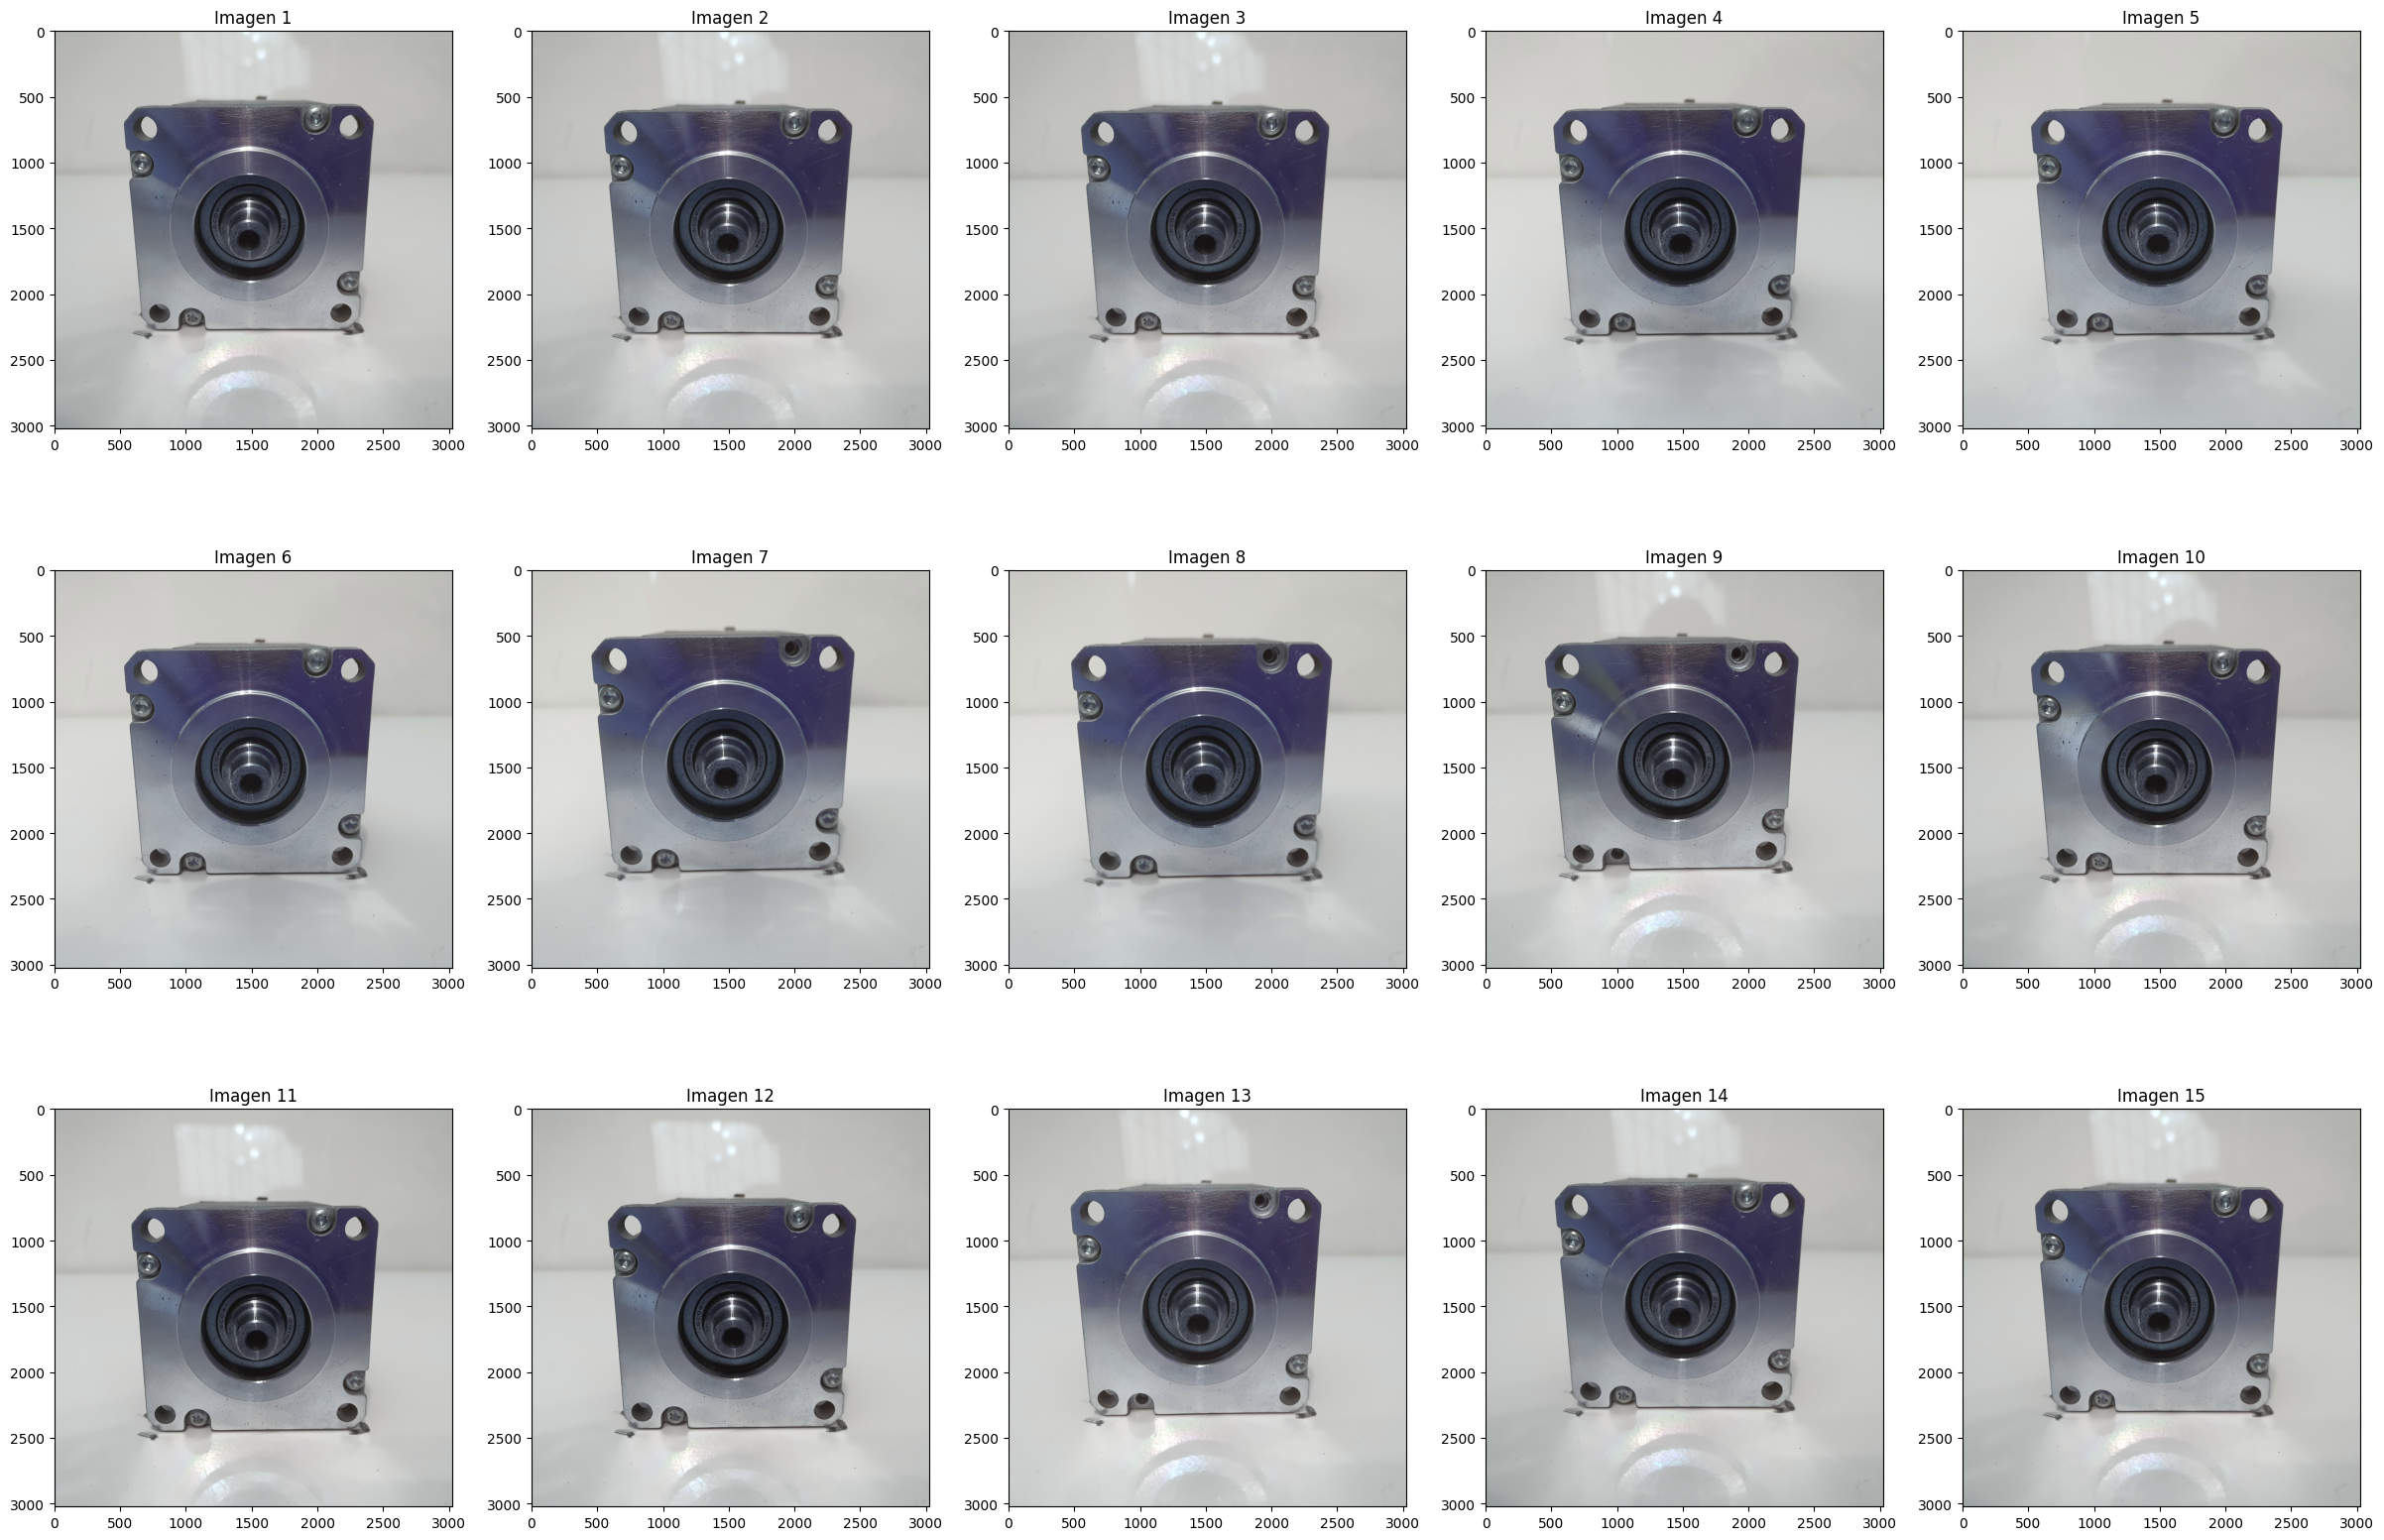

In [166]:
ShowImagesExploratotyData(pics, tits, 30, 20)

## **Carga de Imagen de Referencia**

In [ ]:
GoodSample = '/content/drive/MyDrive/Colab Notebooks/Proyecto Integrador/Imagenes/Ref.jpg'

In [ ]:
picref1 = cv2.imread(GoodSample,0)                              #El cero significa que la imagen se carga en escala de grises

## **Mostrar Imagen de Referencia**

In [ ]:
#Define funcion para mostar imagen
def ShowImages(pictures,titles,x,y):

  qty = len(pictures)                                          #qty = Cantidad de imagenes en la lista de imagenes
  fig = plt.figure(figsize=(x, y))                             #fig = crea figura con dimension x, y

  #Itera las imagenes y los titulos para anexarlos a figura
  for i, (img,tit) in enumerate(zip(pictures,titles)):
    a = fig.add_subplot(1,qty,i+1)                             #a = Agrega subplot
    imgplot = plt.imshow(img, cmap="gray")                     #Muestra imagen en escala de grises
    a.set_title(tit)                                           #Establece titulo

  #Muestra figura con imagenes y titulos
  plt.show()

In [ ]:
pics = []                                                      #Se crea lista de imagenes
tits = []                                                      #Se crea lista de titulos

In [ ]:
pics.append(picref1)                                           #Se agrega imagen al listado de imagenes
tits.append('Referencia')                                      #Se agrega titulo al listado de titulos

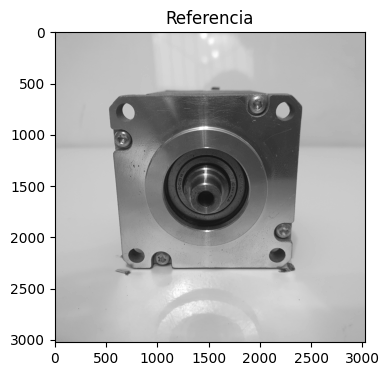

In [ ]:
ShowImages(pics,tits,4,8)                                      #Se crea figura usando la imagen de un motor considerado como bueno

## **Histograma de Ecualización**

Se procede a extraer la distribución de los valores de los pixeles en la imagen.
Idealmente, la imagen debería tener una distribución de valores relativamente parejo, indicando un buen contraste y haciendo más fácil la extracción de información análitica.
Una manera fácil de verificar esto es graficando el histograma.

Otra útil manera de visualizar las estadísticas de la imagen es con un gráfico de función de distribución acumulativa (CDF). Lo que muestra las frecuencias de intensidad de pixeles acumulativas de 0 a 255.

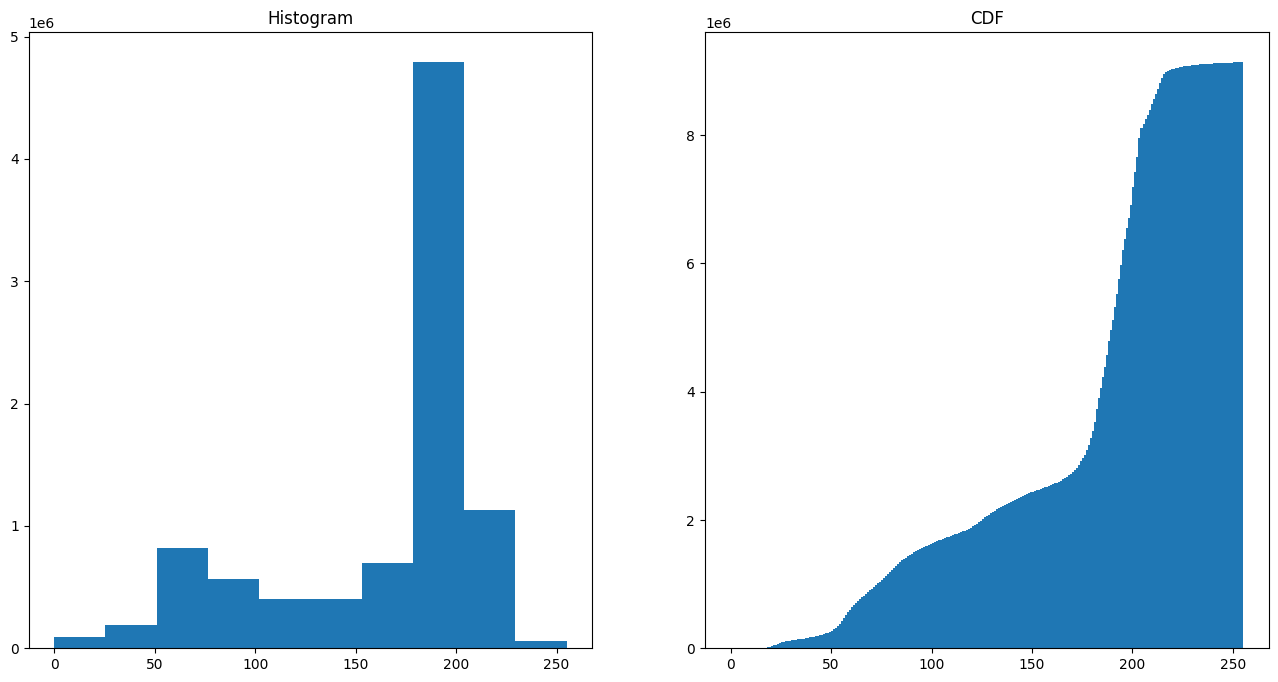

In [ ]:
# Create a figure
fig = plt.figure(figsize=(16, 8))

# Subplot for original image
a=fig.add_subplot(1,2,1)
imgplot = plt.hist(picref1.ravel())
a.set_title('Histogram')

# Subplot for processed image
a=fig.add_subplot(1,2,2)
imgplot = plt.hist(picref1.ravel(), bins=255, cumulative=True)
a.set_title('CDF')

plt.show()

El histograma y el CDF de nuestra imagen de referencia nos muestra una distribución muy dispareja, lo que quiere decir que hay demasiado contraste en la imágen. Idealmente, se deberían ecualizar los valores de las imágenes que queremos analizar para intentar hacerlas más consistentes en terminos de la figura.

El histograma de ecualización es comúnmente utilizado para mejorar las estadísticas de la imagen. En términos sencillos, el algoritmos de histograma de ecualización trata de ajustar los valores de los pixeles en la imagen para crear una distribución más uniforme.

In [ ]:
picref1_eq = exposure.equalize_hist(picref1)    #Codigo para aplicar algoritmo de histograma de ecualización.

In [ ]:
pics.append(picref1_eq)                         #Se egrega imagen ecualizada
tits.append('Referencia Ecualizada')            #Titulo de imagen ecualizada

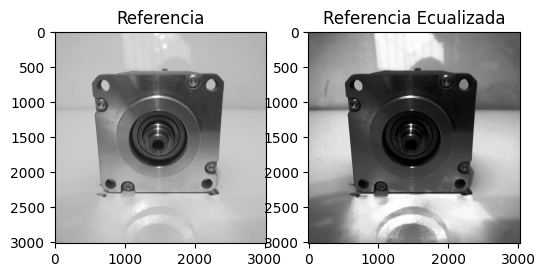

In [ ]:
ShowImages(pics,tits,6,10)                      #Se muestra figura con imagen original y ecualizada

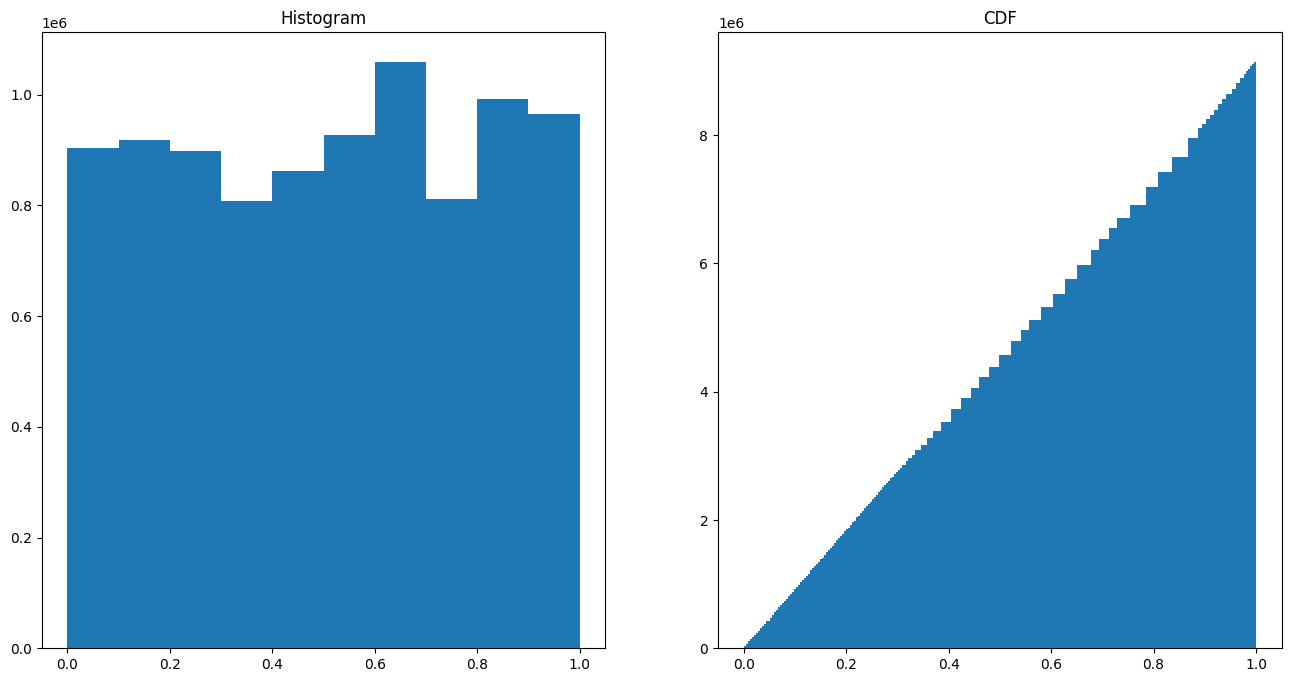

In [ ]:
# Create a figure
fig = plt.figure(figsize=(16, 8))

# Subplot for original image
a=fig.add_subplot(1,2,1)
imgplot = plt.hist(picref1_eq.ravel())
a.set_title('Histogram')

# Subplot for processed image
a=fig.add_subplot(1,2,2)
imgplot = plt.hist(picref1_eq.ravel(), bins=255, cumulative=True)
a.set_title('CDF')

plt.show()

La intensidad de los pixeles están distribuídas más uniformemente en la imagen ecualizada. En particular, la densidad acumulada muestra una diagonal de acumulación casi recta, lo que es una buena señal de que los valores de intensidad de los pixeles han sido ecualizados.

## **Sustracción de Imágenes (Comparación)**

Habiendo analizado la imagen de referencia, se procede a aplicar el mismo procedimiento con la imagen que se desea comparar.

En este caso, por motivos de practicidad, se tomara la imagen de referencia poniendo algunas marcas para tomarla como la imagen a comparar y que la sustracción sea más precisa.

In [ ]:
BadSample = '/content/drive/MyDrive/Colab Notebooks/Proyecto Integrador/Imagenes/NoScrews2.jpg'

In [ ]:
picref2 = cv2.imread(BadSample,0)                  #El cero significa que la imagen se carga en escala de grises

In [ ]:
picref2_eq = exposure.equalize_hist(picref2)       #Se ecualiza la segunda imagen

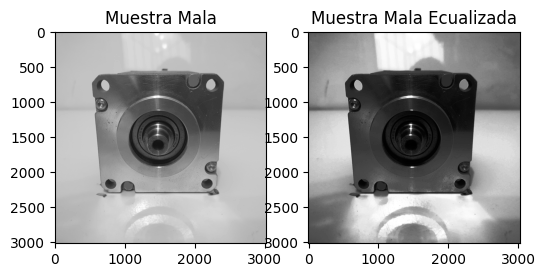

In [ ]:
#Se crea listado de imagenes y titulos
pics2 = []
tits2 = []

#Se agregan elementos al listado
pics2.append(picref2)
tits2.append('Muestra Mala')
pics2.append(picref2_eq)
tits2.append('Muestra Mala Ecualizada')

#Se muestra figura con imagen de muestra de motor considerado como malo y su imagen ecualizada
ShowImages(pics2,tits2,6,10)

En este caso, en la imagen Muestra Mala, fueron desaparecidos dos de los tornillos que se encuentran en el marco.

In [ ]:
comparacion = cv2.subtract(picref1_eq,picref2_eq)

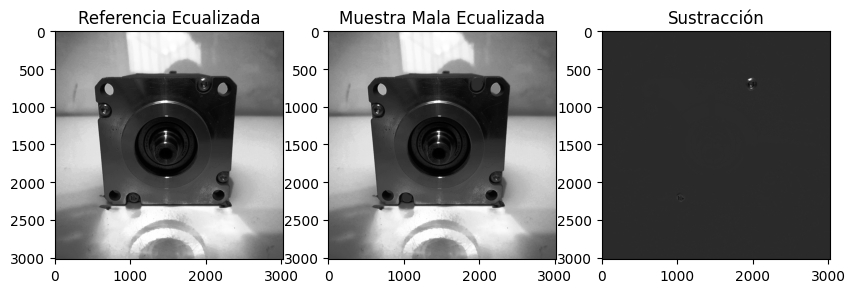

In [ ]:
pics3 = []
tits3 = []
pics3.append(picref1_eq)
tits3.append('Referencia Ecualizada')
pics3.append(picref2_eq)
tits3.append('Muestra Mala Ecualizada')
pics3.append(comparacion)
tits3.append('Sustracción')
ShowImages(pics3,tits3,10,10)

Al realizar una sustracción entre la imagen de referencia y la imagen "muestra mala" (ambas ecualizadas), el resultado que se obtiene es la identificación de uno de los tornillos faltantes en la pieza. El segundo tornillo también se alcanza a apreciar pero con menor intensidad.

Los resultados obtenidos nos lleva a pensar que se deben aplicar filtros diferentes a las imágenes para poder realzar aún más aquellas características que queremos comparar, que en este caso son la presencia de los cuatro tornillos en el marco del motor. Pero esto nos sirve como base para eventualmente utilizar algoritmos detección más complejos.

## **Bibliografía**

* [1] ¿Qué es el análisis exploratorio de datos? | IBM. (s. f.). https://www.ibm.com/mx-es/topics/exploratory-data-analysis
* [2] Redacción, D. (2023, 24 agosto). Guía de Análisis Exploratorio de Datos (EDA) en Python para Principiantes: Paso a Paso. dataXpertos. https://dataxpertos.com/guia-analisis-exploratorio-python-eda/